In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio

In [5]:
# Load initial dataset
datafile = 'ex3/ex3data1.mat'
data = sio.loadmat(datafile)
X, Y = data['X'], data['y']

# X is a 5000 x 400 matrix. 5000 training samples of digit images written
# as a 20x20 images 'unrolled' into a 400-dimensional vector.
# each row is a training example.
print X.shape

# 5000 x 1 matrix representing the labels for our training set
# Digits are stored as 1-10, where 10 represents '0'
print Y.shape

(5000, 400)
(5000, 1)


### Visualizing the data

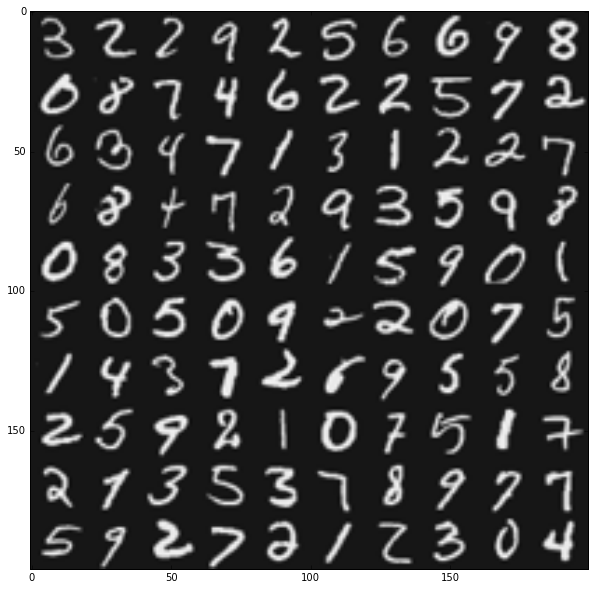

In [40]:
import random
import scipy.misc

# Compute number of items to display
display_rows, display_cols = 10, 10

total_digits = display_rows * display_cols

# Compute the size of each item to be displayed
example_height, example_width = 20, 20

# Get random indices to be displayed.
# random.sample(population,k) 
# where k is the number of items to select from the population
rows_to_display = random.sample(range(X.shape[0]),total_digits)

# Create initial picture by multiplying
# the number of rows to be displayed + the height of one digit
# and the nubmer of cols to be displayed + the width of one digit
picture = np.zeros((display_rows * example_height, display_cols * example_width))

curr_row, curr_col = 0, 0
for row in rows_to_display:
    if curr_col == display_cols:
        curr_col = 0
        curr_row += 1
    
    # Get digit image from 400x1 row. (Transform to 20x20)
    curr_digit = X[row].reshape(example_height, example_width).T
    
    # Row and col to be replaced with digit
    modified_row = curr_row * example_height
    modified_col = curr_col * example_width
    
    # Get specific and replace
    picture[modified_row:modified_row + curr_digit.shape[0],modified_col:modified_col + curr_digit.shape[1]] = curr_digit
    curr_col += 1

# Display image
image = scipy.misc.toimage(picture)
plt.figure(figsize=(10,10))
plt.imshow(image, cmap='gray')